In [492]:
%matplotlib inline

In [493]:
#import library
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For unit testing answers.
from unittest.mock import patch, Mock

In [494]:
# making data frame from the csv file 
df = pd.read_csv('/Users/katiewhittington/Desktop/datavis/Group.csv', 
                 skiprows=[1],usecols = [1,2,3,4,5,6,7,8,9,10,11,12])

# printing the first 5 rows of  the data
df.head(5)

,Age,Gender,How much did you spend between 23rd March to 23rd April on Online Shopping?,How much did you save between 23rd March to 23rd April from not Shopping Online? (not purchasing items online),How much did you spend between 23rd March to 23rd April on Hospitality?,How much did you save between 23rd March to 23rd April on no Hospitality? (not hosting guests or parties),How much did you spend between 23rd March to 23rd April on Transport?,How much did you save between 23rd March to 23rd April by not using Transport? (not using forms of transport or public transport eg: trains or cars),How much did you spend between 23rd March to 23rd April on Leisure Activities?,How much did you save between 23rd March to 23rd April by not doing Leisure Activities? (not taking part in leisure activities eg: sports and clubs),What were other areas you spent money on- between 23rd March to 23rd April 2020?,How much did you spend on these areas- between 23rd March to 23rd April 2020?
0,18 - 24,Male,£20.01 - £40,£20.01 - £40,£0 - £20,£0 - £20,£20.01 - £40,£80.01+,£0 - £20,£0 - £20,Non,£0 - £20
1,18 - 24,Male,£80.01+,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£40.01 - £60,online shopping,£80.01+
2,35 - 44,Male,£80.01+,£0 - £20,£20.01 - £40,£20.01 - £40,£0 - £20,£80.01+,£80.01+,£0 - £20,"rent, monthly subscriptions , prescription med...",£80.01+
3,18 - 24,Female,£80.01+,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£20.01 - £40,£0 - £20,£40.01 - £60,Rent,£80.01+
4,18 - 24,Male,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,Clothes,£80.01+


In [495]:
#number of rows and columns
df.shape

(55, 12)

In [496]:
#changing column names
df.columns = ['age', 'gender', 'shoppingexpenses', 'shoppingSavings',
              'hospitalityExpenses','hospitalitySavings','transportExpenses','transportSavings',
              'leisureExpenses','leisureSavings',
              'otherExpenses','amountExpenses']
df.head(5)

,age,gender,shoppingexpenses,shoppingSavings,hospitalityExpenses,hospitalitySavings,transportExpenses,transportSavings,leisureExpenses,leisureSavings,otherExpenses,amountExpenses
0,18 - 24,Male,£20.01 - £40,£20.01 - £40,£0 - £20,£0 - £20,£20.01 - £40,£80.01+,£0 - £20,£0 - £20,Non,£0 - £20
1,18 - 24,Male,£80.01+,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£40.01 - £60,online shopping,£80.01+
2,35 - 44,Male,£80.01+,£0 - £20,£20.01 - £40,£20.01 - £40,£0 - £20,£80.01+,£80.01+,£0 - £20,"rent, monthly subscriptions , prescription med...",£80.01+
3,18 - 24,Female,£80.01+,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£20.01 - £40,£0 - £20,£40.01 - £60,Rent,£80.01+
4,18 - 24,Male,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,Clothes,£80.01+


In [497]:
#missing/null Values
df.isnull().sum()

age                    0
gender                 0
shoppingexpenses       0
shoppingSavings        0
hospitalityExpenses    0
hospitalitySavings     0
transportExpenses      0
transportSavings       0
leisureExpenses        0
leisureSavings         0
otherExpenses          1
amountExpenses         0
dtype: int64

In [498]:
# dropping all those rows which  have any missing value in it. 
df.dropna(inplace = True) 
df.isnull().sum()

age                    0
gender                 0
shoppingexpenses       0
shoppingSavings        0
hospitalityExpenses    0
hospitalitySavings     0
transportExpenses      0
transportSavings       0
leisureExpenses        0
leisureSavings         0
otherExpenses          0
amountExpenses         0
dtype: int64

In [499]:
#findding whether the dataset contain duplicate rows
df.duplicated().sum()

6

In [500]:
df[df.duplicated(keep=False)]

,age,gender,shoppingexpenses,shoppingSavings,hospitalityExpenses,hospitalitySavings,transportExpenses,transportSavings,leisureExpenses,leisureSavings,otherExpenses,amountExpenses
6,25 - 34,Female,£0 - £20,£0 - £20,£0 - £20,£0 - £20,£0 - £20,£0 - £20,£0 - £20,£0 - £20,None,£0 - £20
9,18 - 24,Female,£80.01+,£80.01+,£80.01+,£80.01+,60.01 - £80,£80.01+,£0 - £20,£40.01 - £60,Takeouts,£80.01+
12,35 - 44,Male,£80.01+,£80.01+,£0 - £20,£80.01+,£0 - £20,£80.01+,£0 - £20,£80.01+,Online home shopping,£80.01+
30,35 - 44,Male,£80.01+,£80.01+,£0 - £20,£80.01+,£0 - £20,£80.01+,£0 - £20,£80.01+,Online home shopping,£80.01+
33,25 - 34,Female,£0 - £20,£0 - £20,£0 - £20,£0 - £20,£0 - £20,£0 - £20,£0 - £20,£0 - £20,None,£0 - £20
41,18 - 24,Female,£80.01+,£80.01+,£80.01+,£80.01+,60.01 - £80,£80.01+,£0 - £20,£40.01 - £60,Takeouts,£80.01+
45,18 - 24,Female,60.01 - £80,£20.01 - £40,£20.01 - £40,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,Skincare/makeup/food,£80.01+
46,18 - 24,Female,60.01 - £80,£20.01 - £40,£20.01 - £40,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,Skincare/makeup/food,£80.01+
51,35 - 44,Male,60.01 - £80,£20.01 - £40,£0 - £20,£0 - £20,60.01 - £80,£20.01 - £40,£0 - £20,£80.01+,"Rent, electricity",£0 - £20
52,35 - 44,Male,60.01 - £80,£20.01 - £40,£0 - £20,£0 - £20,60.01 - £80,£20.01 - £40,£0 - £20,£80.01+,"Rent, electricity",£0 - £20


In [501]:
# inspect data dtype
df.dtypes

age                    object
gender                 object
shoppingexpenses       object
shoppingSavings        object
hospitalityExpenses    object
hospitalitySavings     object
transportExpenses      object
transportSavings       object
leisureExpenses        object
leisureSavings         object
otherExpenses          object
amountExpenses         object
dtype: object

In [502]:
#convert columns to nominal data type. 
df['age'] = df['age'].astype('category') 
df['gender'] = df['gender'].astype('category') 
df['shoppingexpenses'] = df['shoppingexpenses'].astype('category')
df['shoppingSavings'] = df['shoppingSavings'].astype('category')
df['hospitalityExpenses'] = df['hospitalityExpenses'].astype('category')
df['hospitalitySavings'] = df['hospitalitySavings'].astype('category')
df['transportExpenses'] = df['transportExpenses'].astype('category')
df['transportSavings'] = df['transportSavings'].astype('category')
df['leisureExpenses'] = df['leisureExpenses'].astype('category')
df['leisureSavings'] = df['leisureSavings'].astype('category')
df['leisureSavings'] = df['leisureSavings'].astype('category')
df['otherExpenses'] = df['otherExpenses'].astype('str')
df['amountExpenses'] = df['amountExpenses'].astype('category')

In [503]:
# inspect data dtype
df.dtypes


age                    category
gender                 category
shoppingexpenses       category
shoppingSavings        category
hospitalityExpenses    category
hospitalitySavings     category
transportExpenses      category
transportSavings       category
leisureExpenses        category
leisureSavings         category
otherExpenses            object
amountExpenses         category
dtype: object

In [504]:
#ordering categorical
shoppingexpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['shoppingexpenses'] = df['shoppingexpenses'].astype( pd.CategoricalDtype(ordered=True,categories=shoppingexpenses_ordered))

# Inspect dtype.
df['shoppingexpenses'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [505]:
#ordering categorical
shoppingSavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['shoppingSavings'] = df['shoppingSavings'].astype( pd.CategoricalDtype(ordered=True,categories=shoppingSavings_ordered))

# Inspect dtype.
df['shoppingSavings'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [506]:
#ordering categorical
hospitalityExpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['hospitalityExpenses'] = df['hospitalityExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=hospitalityExpenses_ordered))

# Inspect dtype.
df['hospitalityExpenses'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [507]:
#ordering categorical
hospitalitySavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['hospitalitySavings'] = df['hospitalitySavings'].astype( pd.CategoricalDtype(ordered=True,categories=hospitalitySavings_ordered))

# Inspect dtype.
df['hospitalitySavings'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [508]:
#ordering categorical
hospitalitySavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['hospitalitySavings'] = df['hospitalitySavings'].astype( pd.CategoricalDtype(ordered=True,categories=hospitalitySavings_ordered))

# Inspect dtype.
df['hospitalitySavings'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [509]:
transportExpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['transportExpenses'] = df['transportExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=transportExpenses_ordered))

# Inspect dtype.
df['transportExpenses'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [510]:
transportSavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['transportSavings'] = df['transportSavings'].astype( pd.CategoricalDtype(ordered=True,categories=transportSavings_ordered))

# Inspect dtype.
df['transportSavings'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [511]:
leisureExpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['leisureExpenses'] = df['leisureExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=leisureExpenses_ordered))

# Inspect dtype.
df['leisureExpenses'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [512]:
leisureSavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['leisureSavings'] = df['leisureSavings'].astype( pd.CategoricalDtype(ordered=True,categories=leisureSavings_ordered))

# Inspect dtype.
df['leisureSavings'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [513]:
amountExpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']

# Set correct data types.
df['amountExpenses'] = df['amountExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=amountExpenses_ordered))

# Inspect dtype.
df['amountExpenses'].dtype

CategoricalDtype(categories=['£0 - £20', '£20.01 - £40', '£40.01 - £60', '60.01 - £80',
                  '£80.01+'],
                 ordered=True)

In [514]:
#overview of the dataset
df.head().append(df.tail())


,age,gender,shoppingexpenses,shoppingSavings,hospitalityExpenses,hospitalitySavings,transportExpenses,transportSavings,leisureExpenses,leisureSavings,otherExpenses,amountExpenses
0,18 - 24,Male,£20.01 - £40,£20.01 - £40,£0 - £20,£0 - £20,£20.01 - £40,£80.01+,£0 - £20,£0 - £20,Non,£0 - £20
1,18 - 24,Male,£80.01+,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£40.01 - £60,online shopping,£80.01+
2,35 - 44,Male,£80.01+,£0 - £20,£20.01 - £40,£20.01 - £40,£0 - £20,£80.01+,£80.01+,£0 - £20,"rent, monthly subscriptions , prescription med...",£80.01+
3,18 - 24,Female,£80.01+,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£20.01 - £40,£0 - £20,£40.01 - £60,Rent,£80.01+
4,18 - 24,Male,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,Clothes,£80.01+
50,18 - 24,Female,£40.01 - £60,£40.01 - £60,£20.01 - £40,£20.01 - £40,£20.01 - £40,£40.01 - £60,£0 - £20,£20.01 - £40,Food,60.01 - £80
51,35 - 44,Male,60.01 - £80,£20.01 - £40,£0 - £20,£0 - £20,60.01 - £80,£20.01 - £40,£0 - £20,£80.01+,"Rent, electricity",£0 - £20
52,35 - 44,Male,60.01 - £80,£20.01 - £40,£0 - £20,£0 - £20,60.01 - £80,£20.01 - £40,£0 - £20,£80.01+,"Rent, electricity",£0 - £20
53,25 - 34,Female,£80.01+,£0 - £20,60.01 - £80,£0 - £20,£40.01 - £60,£0 - £20,60.01 - £80,£0 - £20,food uber eats deliveroo,£80.01+
54,25 - 34,Female,£80.01+,£0 - £20,60.01 - £80,£0 - £20,£40.01 - £60,£0 - £20,60.01 - £80,£0 - £20,food uber eats deliveroo,£80.01+


In [515]:
# Inspect dtype.
df.dtypes

age                    category
gender                 category
shoppingexpenses       category
shoppingSavings        category
hospitalityExpenses    category
hospitalitySavings     category
transportExpenses      category
transportSavings       category
leisureExpenses        category
leisureSavings         category
otherExpenses            object
amountExpenses         category
dtype: object

In [516]:
#who spent more during lockdown, woman or men  ?
pd.crosstab(df['shoppingexpenses'], df['gender'],margins=True)

gender,Female,Male,All
shoppingexpenses,,,
£0 - £20,5,2,7
£20.01 - £40,3,5,8
£40.01 - £60,4,1,5
60.01 - £80,4,5,9
£80.01+,17,8,25
All,33,21,54


## Here we are exploring how the stacked bar graph looks. This did not look as good as the percentage one below

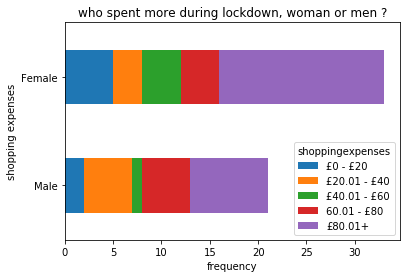

In [518]:

# Generate cross tabulation.
table = pd.crosstab( df['gender'], df['shoppingexpenses'],margins=True) 
# Remove the All row, we don’t need it.
table.drop('All', axis='rows', inplace=True)
# Sort by the All column.
table = table.sort_values(by='All', ascending=False) 
# Remove the All column before plotting. 
table.drop('All', axis='columns', inplace=True)

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.set_title('who spent more during lockdown, woman or men ?') 
ax.set_xlabel('frequency')
ax.set_ylabel('shopping expenses') 
plt.show()

## When using the percentage bar stacked graph instead we found it to be more cleaer to read, especially when certain groups become very large and you can read that over 50% of participants had selected our question. 

### Example below shows that over 50% of female paricipants spent over £80.01+ on expenses.

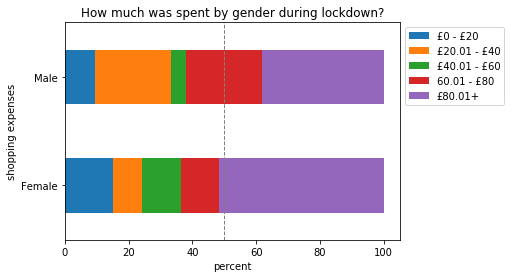

In [519]:
# Generate normalised cross tabulation.
table = pd.crosstab(df['gender'], df['shoppingexpenses'], normalize='index') 
# Sort by female responses and convert to percentage.
table = table.sort_values(by='gender', ascending=False) * 100

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1) 
ax.set_title('How much was spent by gender during lockdown?') 
ax.set_xlabel('percent')
ax.set_ylabel('shopping expenses')
# Place legent outside plot axes.
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [520]:
#who spent more during lockdown, woman or men  ?
pd.crosstab(df['shoppingexpenses'], df['gender'],margins=True)

gender,Female,Male,All
shoppingexpenses,,,
£0 - £20,5,2,7
£20.01 - £40,3,5,8
£40.01 - £60,4,1,5
60.01 - £80,4,5,9
£80.01+,17,8,25
All,33,21,54


In [521]:
#average expenses during lockdown
pd.crosstab(df['shoppingexpenses'], df['age'],margins=True)

age,18 - 24,25 - 34,35 - 44,45+,All
shoppingexpenses,,,,,
£0 - £20,1,6,0,0,7
£20.01 - £40,5,3,0,0,8
£40.01 - £60,5,0,0,0,5
60.01 - £80,4,3,2,0,9
£80.01+,14,4,5,2,25
All,29,16,7,2,54


In [523]:
#average expenses during lockdown
pd.crosstab(df['hospitalityExpenses'], df['age'],margins=True)

age,18 - 24,25 - 34,35 - 44,45+,All
hospitalityExpenses,,,,,
£0 - £20,15,10,6,1,32
£20.01 - £40,7,3,1,0,11
£40.01 - £60,2,0,0,1,3
60.01 - £80,2,2,0,0,4
£80.01+,3,1,0,0,4
All,29,16,7,2,54


In [525]:
#average expenses during lockdown
pd.crosstab(df['transportExpenses'], df['age'],margins=True)

age,18 - 24,25 - 34,35 - 44,45+,All
transportExpenses,,,,,
£0 - £20,16,11,5,2,34
£20.01 - £40,7,1,0,0,8
£40.01 - £60,1,3,0,0,4
60.01 - £80,3,0,2,0,5
£80.01+,2,1,0,0,3
All,29,16,7,2,54


In [527]:
#average expenses during lockdown
pd.crosstab(df['leisureExpenses'], df['age'],margins=True)

age,18 - 24,25 - 34,35 - 44,45+,All
leisureExpenses,,,,,
£0 - £20,28,9,6,2,45
£20.01 - £40,1,3,0,0,4
£40.01 - £60,0,1,0,0,1
60.01 - £80,0,2,0,0,2
£80.01+,0,1,1,0,2
All,29,16,7,2,54


In [529]:
#average expenses during lockdown
pd.crosstab(df['amountExpenses'], df['age'],margins=True)

age,18 - 24,25 - 34,35 - 44,45+,All
amountExpenses,,,,,
£0 - £20,2,4,2,0,8
£20.01 - £40,3,3,0,0,6
£40.01 - £60,5,1,0,0,6
60.01 - £80,2,0,0,0,2
£80.01+,17,8,5,2,32
All,29,16,7,2,54


In [531]:
#average expenses during lockdown
pd.crosstab(df['amountExpenses'], df['gender'],margins=True)

gender,Female,Male,All
amountExpenses,,,
£0 - £20,5,3,8
£20.01 - £40,3,3,6
£40.01 - £60,5,1,6
60.01 - £80,2,0,2
£80.01+,18,14,32
All,33,21,54


In [533]:
#average expenses during lockdown
pd.crosstab(df['shoppingSavings'], df['gender'],margins=True)

gender,Female,Male,All
shoppingSavings,,,
£0 - £20,14,11,25
£20.01 - £40,5,5,10
£40.01 - £60,3,0,3
60.01 - £80,1,2,3
£80.01+,10,3,13
All,33,21,54


## Our final question asked participants to submit their own answer to their expenses. A heatmap showed these answers very well compared to a bar graph, as we had so many submit answers. They way was to clearer to read and pick out where the highest answers were.

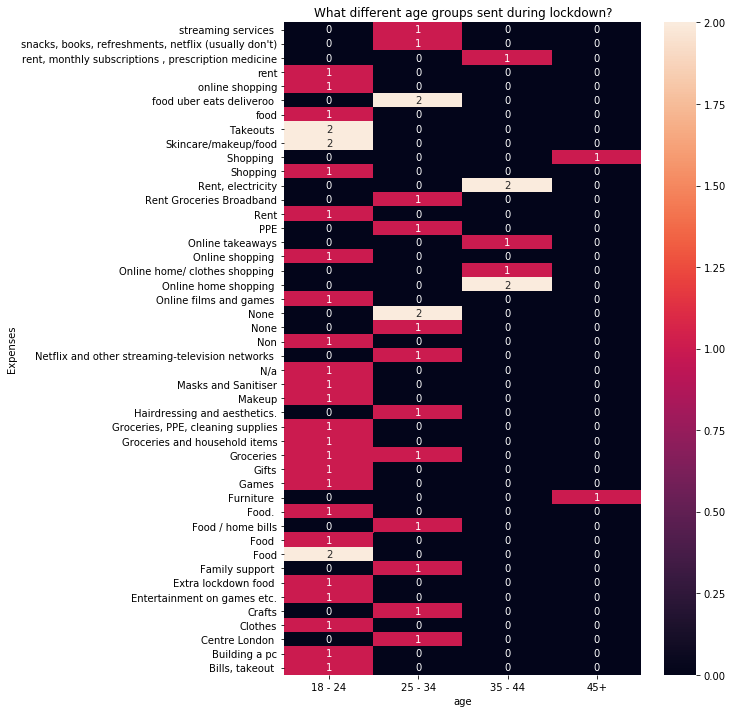

In [535]:
# Generate normalised cross tabulation.
#table = pd.crosstab(df['shoppingSavings'], df['gender']) 
table = pd.crosstab(df['otherExpenses'], df['age'])
# Remove nonbinary from this visualisation. 
#table.drop('All', axis='columns', inplace=True) 
# Sort by female responses.
plt.figure(figsize=(8,12))
table = table.sort_values(by='otherExpenses', ascending=False) #age was Female
ax = sns.heatmap(table, annot=True) 
ax.set_title('What different age groups sent during lockdown?') 
ax.set_xlabel('age')
ax.set_ylabel('Expenses')
plt.show()

In [536]:
#average expenses during lockdown
pd.crosstab(df['otherExpenses'], df['gender'],margins=True)

gender,Female,Male,All
otherExpenses,,,
"Bills, takeout",1,0,1
Building a pc,1,0,1
Centre London,1,0,1
Clothes,0,1,1
Crafts,1,0,1
Entertainment on games etc.,0,1,1
Extra lockdown food,1,0,1
Family support,0,1,1
Food,2,0,2


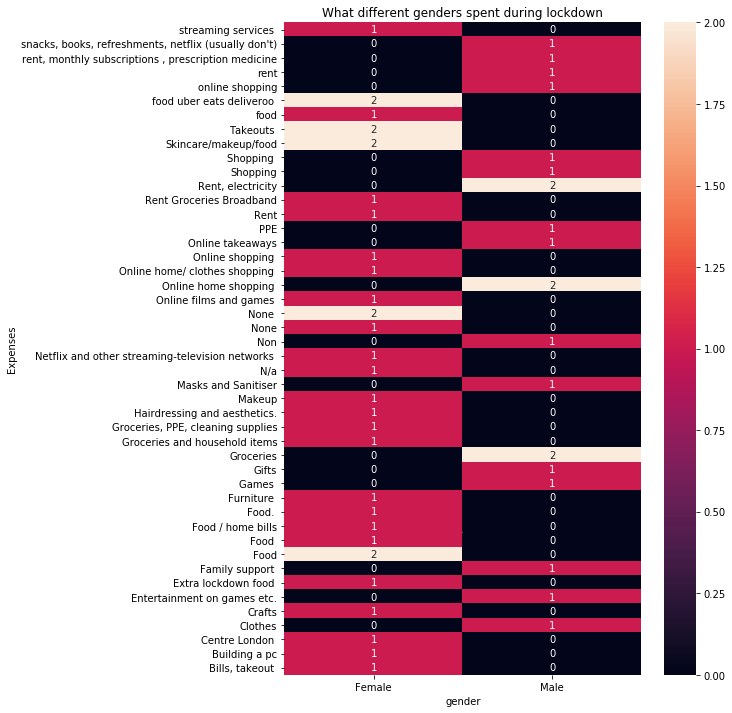

In [537]:
# Generate normalised cross tabulation.
#table = pd.crosstab(df['shoppingSavings'], df['gender']) 
table = pd.crosstab(df['otherExpenses'], df['gender'])
# Remove nonbinary from this visualisation. 
#table.drop('All', axis='columns', inplace=True) 
# Sort by female responses.
table = table.sort_values(by='otherExpenses', ascending=False) #age was Female
plt.figure(figsize=(8,12))
ax = sns.heatmap(table, annot=True) 
ax.set_title('What different genders spent during lockdown') 
ax.set_xlabel('gender')
ax.set_ylabel('Expenses')
plt.show()

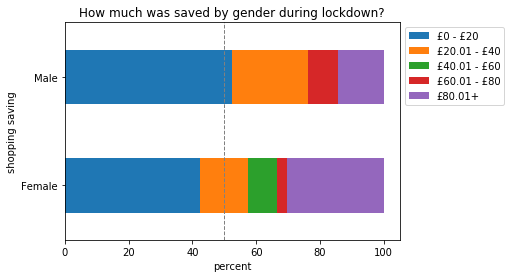

In [550]:
# Generate normalised cross tabulation.
table = pd.crosstab(df['gender'], df['shoppingSavings'], normalize='index') 
# Sort by female responses and convert to percentage.
table = table.sort_values(by='gender', ascending=False) * 100

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1) 
ax.set_title('How much was saved by gender during lockdown?') 
ax.set_xlabel('percent')
ax.set_ylabel('shopping saving')
# Place legent outside plot axes.
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

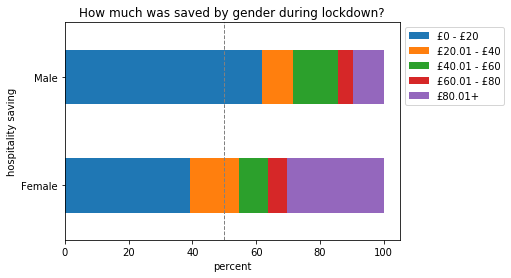

In [551]:
# Generate normalised cross tabulation.
table = pd.crosstab(df['gender'], df['hospitalitySavings'], normalize='index') 
# Sort by female responses and convert to percentage.
table = table.sort_values(by='gender', ascending=False) * 100

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1) 
ax.set_title('How much was saved by gender during lockdown?') 
ax.set_xlabel('percent')
ax.set_ylabel('hospitality saving')
# Place legent outside plot axes.
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

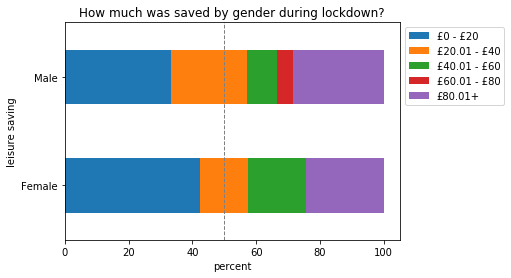

In [555]:
# Generate normalised cross tabulation.
table = pd.crosstab(df['gender'], df['leisureSavings'], normalize='index') 
# Sort by female responses and convert to percentage.
table = table.sort_values(by='gender', ascending=False) * 100

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1) 
ax.set_title('How much was saved by gender during lockdown?') 
ax.set_xlabel('percent')
ax.set_ylabel('leisure saving')
# Place legent outside plot axes.
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

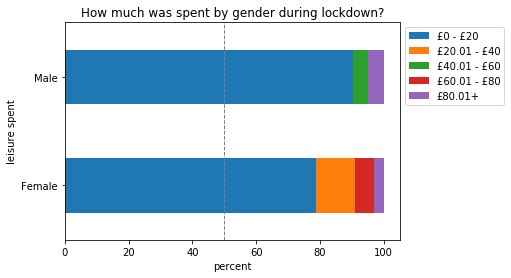

In [554]:

# Generate normalised cross tabulation.
table = pd.crosstab(df['gender'], df['leisureExpenses'], normalize='index') 
# Sort by female responses and convert to percentage.
table = table.sort_values(by='gender', ascending=False) * 100

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1) 
ax.set_title('How much was spent by gender during lockdown?') 
ax.set_xlabel('percent')
ax.set_ylabel('leisure spent')
# Place legent outside plot axes.
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

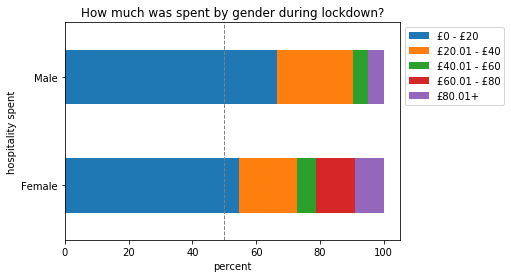

In [552]:
# Generate normalised cross tabulation.
table = pd.crosstab(df['gender'], df['hospitalityExpenses'], normalize='index') 
# Sort by female responses and convert to percentage.
table = table.sort_values(by='gender', ascending=False) * 100

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1) 
ax.set_title('How much was spent by gender during lockdown?') 
ax.set_xlabel('percent')
ax.set_ylabel('hospitality spent')
# Place legent outside plot axes.
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

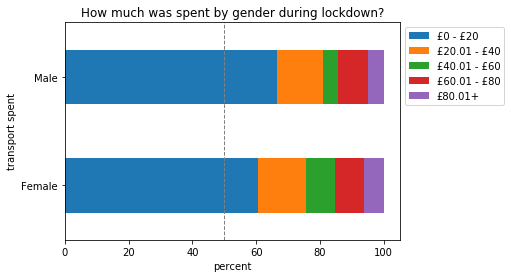

In [553]:
# Generate normalised cross tabulation.
table = pd.crosstab(df['gender'], df['transportExpenses'], normalize='index') 
# Sort by female responses and convert to percentage.
table = table.sort_values(by='gender', ascending=False) * 100

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1) 
ax.set_title('How much was spent by gender during lockdown?') 
ax.set_xlabel('percent')
ax.set_ylabel('transport spent')
# Place legent outside plot axes.
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## Using a standard bar chart to read age groups on question become more clear to read compare to the stacked graph. We found this set the age groups apart for easy reading

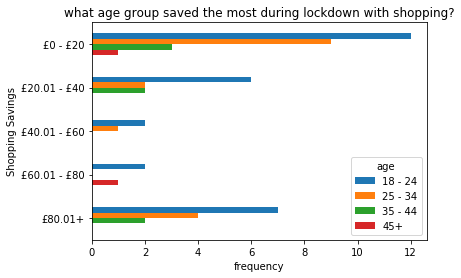

In [541]:
# df = pd.read_csv("Group.csv").dropna()
#df = pd.read_csv("Group.csv", usecols=[1,2,4]).dropna()
#df.columns=["age", "gender", "shoppingSavings"]
shoppingSavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['shoppingSavings'] = df['shoppingSavings'].astype( pd.CategoricalDtype(ordered=True,categories=shoppingSavings_ordered))
# This is the rename line.
df['shoppingSavings'] = df["shoppingSavings"].cat.rename_categories({"60.01 - £80": "£60.01 - £80"})
table = pd.crosstab(df['shoppingSavings'], df['age'], margins=True)
table.drop('All', axis='rows', inplace=True)
# table = table.sort_values(by='All', ascending=False)
table.drop('All', axis='columns', inplace=True)
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('what age group saved the most during lockdown with shopping?') 
ax.set_xlabel('frequency')
ax.set_ylabel('Shopping Savings')
plt.show()

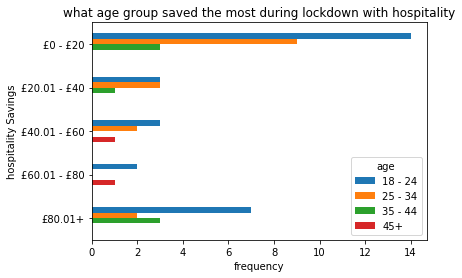

In [542]:
# df = pd.read_csv("Group.csv").dropna()
#df = pd.read_csv("Group.csv", usecols=[1,2,4]).dropna()
#df.columns=["age", "gender", "shoppingSavings"]
hopitalitySavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['hospitalitySavings'] = df['hospitalitySavings'].astype( pd.CategoricalDtype(ordered=True,categories=hospitalitySavings_ordered))
# This is the rename line.
df['hospitalitySavings'] = df["hospitalitySavings"].cat.rename_categories({"60.01 - £80": "£60.01 - £80"})
table = pd.crosstab(df['hospitalitySavings'], df['age'], margins=True)
table.drop('All', axis='rows', inplace=True)
# table = table.sort_values(by='All', ascending=False)
table.drop('All', axis='columns', inplace=True)
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('what age group saved the most during lockdown with hospitality') 
ax.set_xlabel('frequency')
ax.set_ylabel('hospitality Savings')
plt.show()

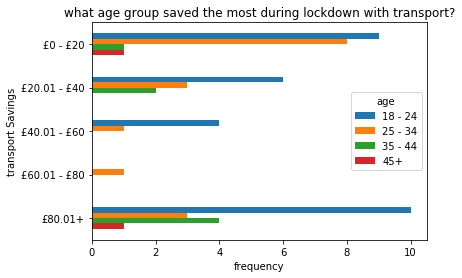

In [543]:
# df = pd.read_csv("Group.csv").dropna()
#df = pd.read_csv("Group.csv", usecols=[1,2,4]).dropna()
#df.columns=["age", "gender", "shoppingSavings"]
transportSavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['transportSavings'] = df['transportSavings'].astype( pd.CategoricalDtype(ordered=True,categories=transportSavings_ordered))
# This is the rename line.
df['transportSavings'] = df["transportSavings"].cat.rename_categories({"60.01 - £80": "£60.01 - £80"})
table = pd.crosstab(df['transportSavings'], df['age'], margins=True)
table.drop('All', axis='rows', inplace=True)
# table = table.sort_values(by='All', ascending=False)
table.drop('All', axis='columns', inplace=True)
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('what age group saved the most during lockdown with transport?') 
ax.set_xlabel('frequency')
ax.set_ylabel('transport Savings')
plt.show()

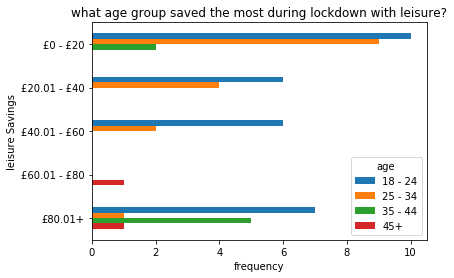

In [544]:
# df = pd.read_csv("Group.csv").dropna()
#df = pd.read_csv("Group.csv", usecols=[1,2,4]).dropna()
#df.columns=["age", "gender", "shoppingSavings"]
leisureSavings_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['leisureSavings'] = df['leisureSavings'].astype( pd.CategoricalDtype(ordered=True,categories=leisureSavings_ordered))
# This is the rename line.
df['leisureSavings'] = df["leisureSavings"].cat.rename_categories({"60.01 - £80": "£60.01 - £80"})
table = pd.crosstab(df['leisureSavings'], df['age'], margins=True)
table.drop('All', axis='rows', inplace=True)
# table = table.sort_values(by='All', ascending=False)
table.drop('All', axis='columns', inplace=True)
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('what age group saved the most during lockdown with leisure?') 
ax.set_xlabel('frequency')
ax.set_ylabel('leisure Savings')
plt.show()

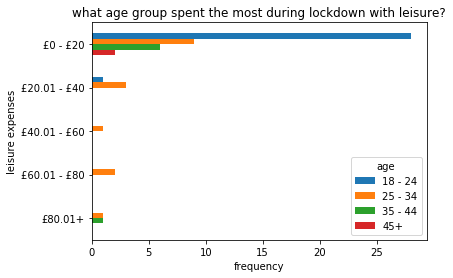

In [545]:
# df = pd.read_csv("Group.csv").dropna()
#df = pd.read_csv("Group.csv", usecols=[1,2,4]).dropna()
#df.columns=["age", "gender", "shoppingSavings"]
leisureExpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['leisureExpenses'] = df['leisureExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=leisureExpenses_ordered))
# This is the rename line.
df['leisureExpenses'] = df["leisureExpenses"].cat.rename_categories({"60.01 - £80": "£60.01 - £80"})
table = pd.crosstab(df['leisureExpenses'], df['age'], margins=True)
table.drop('All', axis='rows', inplace=True)
# table = table.sort_values(by='All', ascending=False)
table.drop('All', axis='columns', inplace=True)
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('what age group spent the most during lockdown with leisure?') 
ax.set_xlabel('frequency')
ax.set_ylabel('leisure expenses')
plt.show()

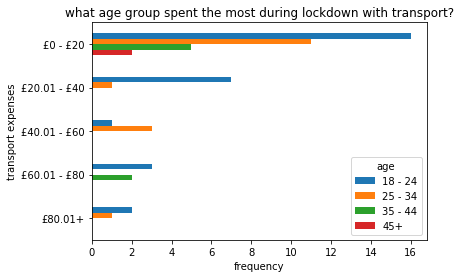

In [546]:
# df = pd.read_csv("Group.csv").dropna()
#df = pd.read_csv("Group.csv", usecols=[1,2,4]).dropna()
#df.columns=["age", "gender", "shoppingSavings"]
transportExpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['transportExpenses'] = df['transportExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=transportExpenses_ordered))
# This is the rename line.
df['transportExpenses'] = df["transportExpenses"].cat.rename_categories({"60.01 - £80": "£60.01 - £80"})
table = pd.crosstab(df['transportExpenses'], df['age'], margins=True)
table.drop('All', axis='rows', inplace=True)
# table = table.sort_values(by='All', ascending=False)
table.drop('All', axis='columns', inplace=True)
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('what age group spent the most during lockdown with transport?') 
ax.set_xlabel('frequency')
ax.set_ylabel('transport expenses')
plt.show()

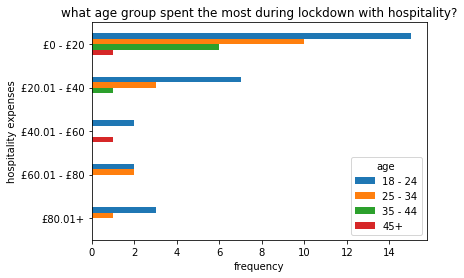

In [547]:
# df = pd.read_csv("Group.csv").dropna()
#df = pd.read_csv("Group.csv", usecols=[1,2,4]).dropna()
#df.columns=["age", "gender", "shoppingSavings"]
hospitalityExpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['hospitalityExpenses'] = df['hospitalityExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=hospitalityExpenses_ordered))
# This is the rename line.
df['hospitalityExpenses'] = df["hospitalityExpenses"].cat.rename_categories({"60.01 - £80": "£60.01 - £80"})
table = pd.crosstab(df['hospitalityExpenses'], df['age'], margins=True)
table.drop('All', axis='rows', inplace=True)
# table = table.sort_values(by='All', ascending=False)
table.drop('All', axis='columns', inplace=True)
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('what age group spent the most during lockdown with hospitality?') 
ax.set_xlabel('frequency')
ax.set_ylabel('hospitality expenses')
plt.show()

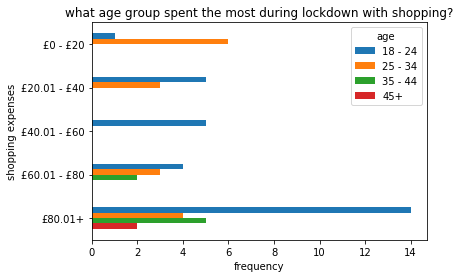

In [549]:
# df = pd.read_csv("Group.csv").dropna()
#df = pd.read_csv("Group.csv", usecols=[1,2,4]).dropna()
#df.columns=["age", "gender", "shoppingSavings"]
shoppingexpenses_ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['shoppingexpenses'] = df['shoppingexpenses'].astype( pd.CategoricalDtype(ordered=True,categories=shoppingexpenses_ordered))
# This is the rename line.
df['shoppingexpenses'] = df["shoppingexpenses"].cat.rename_categories({"60.01 - £80": "£60.01 - £80"})
table = pd.crosstab(df['shoppingexpenses'], df['age'], margins=True)
table.drop('All', axis='rows', inplace=True)
# table = table.sort_values(by='All', ascending=False)
table.drop('All', axis='columns', inplace=True)
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('what age group spent the most during lockdown with shopping?') 
ax.set_xlabel('frequency')
ax.set_ylabel('shopping expenses')
plt.show()